## Results for the Manuscipt

In [1]:
from IPython.utils.io import raw_print

from trans_OLS_gerry import res_affect_transmission_within_sero
%load_ext autoreload
%autoreload 2

import importlib as im
import OrganizeData as DATA
im.reload(DATA)
import sero_survival as clear
im.reload(clear)
import establishment_alt2 as est
im.reload(est)
import drug_sep_OD as DATAds
im.reload(DATAds)

<module 'drug_sep_OD' from '/Users/aswin/polybox/Projects/Maela_project/drug_sep_OD.py'>

In [2]:
## Get all the Data
full_data, cocarriage_events, spec_dict = DATA.create_carriage_dataframe('Infant', 0.5)   # Dataframes with durations of carriage and co-carriage information
illness_df = DATA.import_illness_data()         # Dataframe with each illness episode in children
simple_drug_df = DATA.get_simple_drug_df(full_data, illness_df, treat_length=7)         # Drug use dataframe in Lifelines format
effective_drug_df = DATA.effective_drug_plus_res(full_data, illness_df, treat_length=7)   # Effective drug use in Lifelines format
ineffective_drug_df, D_minus_df = DATA.ineffective_drugs(full_data, illness_df, treat_length=7)  # Ineffective drug use and Resistance-without-drug in Lifelines format

/Users/aswin/polybox/Projects/Maela_project/OrganizeData.py:292: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  specdate=pd.to_datetime(output_df['specdate']))  # Converts the time to time-readable format
/Users/aswin/polybox/Projects/Maela_project/OrganizeData.py:317: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  illness_df = illness_df.assign(date_start=pd.to_datetime(illness_df['date_start']))


#### Section 1: Known aspects of pneumococcal epidemiology

Result 1.1: Duration of carriage determined by age and serotype

In [ ]:
r1a, r1b = clear.sero_survival_basic(full_data)

Result 1.2: Drugs lead to faster clearance of strains

Iteration 1: norm_delta = 0.39904, step_size = 0.95000, ll = -34574.39730, newton_decrement = 283.94942, seconds_since_start = 0.6
Iteration 2: norm_delta = 0.06319, step_size = 0.95000, ll = -34343.37252, newton_decrement = 18.94052, seconds_since_start = 1.4
Iteration 3: norm_delta = 0.01766, step_size = 0.95000, ll = -34322.80357, newton_decrement = 1.12875, seconds_since_start = 2.2
Iteration 4: norm_delta = 0.00317, step_size = 1.00000, ll = -34321.62365, newton_decrement = 0.02386, seconds_since_start = 2.7
Iteration 5: norm_delta = 0.00014, step_size = 1.00000, ll = -34321.59935, newton_decrement = 0.00003, seconds_since_start = 4.4
Iteration 6: norm_delta = 0.00000, step_size = 1.00000, ll = -34321.59932, newton_decrement = 0.00000, seconds_since_start = 6.2
Convergence completed after 6 iterations.


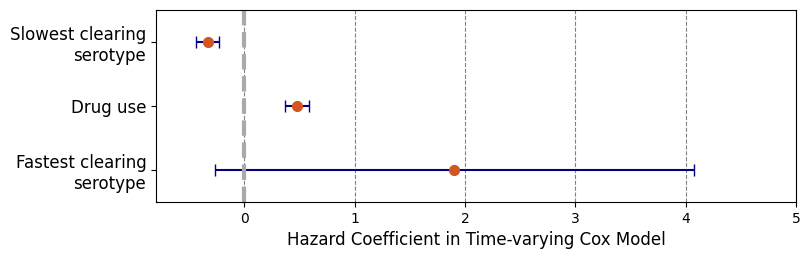

0

In [16]:
r12 = clear.basic_survival_with_drugs(full_data, simple_drug_df)

# PLOTTING RESULT:
covariates_to_plot = ['18B', 'Drug_use', '23F']
y_labels = ['Fastest clearing\nserotype', 'Drug use', 'Slowest clearing\nserotype']
size = (8,0.8*len(y_labels))
xlim = [-0.8, 5]
clear.plot_all_covariate_model(r12.summary, covariates_to_plot, y_labels, size, xlim, filename='figs2b.svg')

In [ ]:
r12.summary

#### Section 2: Within-host competition increases clearance rate


Result 2.1: Presence of competitor leads to faster clearance

Iteration 1: norm_delta = 4.71e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 3.27e+02, seconds_since_start = 0.6
Iteration 2: norm_delta = 1.03e-01, step_size = 0.9500, log_lik = -30802.33910, newton_decrement = 7.34e+01, seconds_since_start = 1.1
Iteration 3: norm_delta = 4.28e-02, step_size = 0.9500, log_lik = -30719.24340, newton_decrement = 9.74e+00, seconds_since_start = 1.6
Iteration 4: norm_delta = 1.42e-02, step_size = 1.0000, log_lik = -30708.49939, newton_decrement = 7.07e-01, seconds_since_start = 1.9
Iteration 5: norm_delta = 1.62e-03, step_size = 1.0000, log_lik = -30707.75026, newton_decrement = 7.71e-03, seconds_since_start = 2.5
Iteration 6: norm_delta = 2.80e-05, step_size = 1.0000, log_lik = -30707.74247, newton_decrement = 2.22e-06, seconds_since_start = 3.6
Iteration 7: norm_delta = 9.06e-09, step_size = 1.0000, log_lik = -30707.74247, newton_decrement = 2.32e-13, seconds_since_start = 4.3
Convergence completed after 7 iterations.


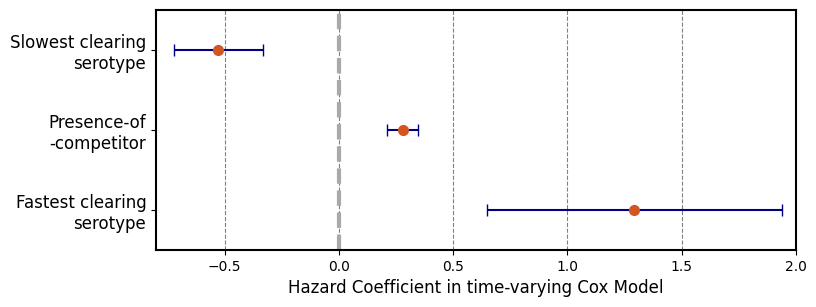

0

In [3]:
r21 = clear.cc_on_survival(full_data, cocarriage_events, interaction=0)

# PLOTTING RESULT:
covariates_to_plot = ['sero_12F', 'Co_carried', 'sero_23F']
y_labels = ['Fastest clearing\nserotype', 'Presence-of\n-competitor', 'Slowest clearing\nserotype']
size = (8, 1*len(y_labels))
xlim = [-0.8, 2]
clear.plot_all_covariate_model(r21.summary, covariates_to_plot, y_labels, size, xlim, filename='fig2a.svg')

In [ ]:
(r21.summary.coef)

Result 2.2: Clearance during within-host competition is dependent on serotype

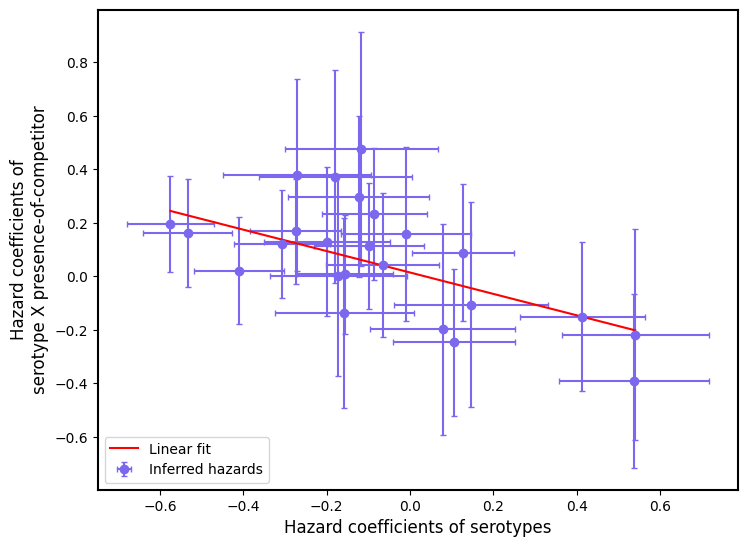

Slope of line is  -0.4001342949867735
CI =  -0.6006001862820527 -0.19966840369149425


In [41]:
# r22 = clear.cc_on_survival(full_data, cocarriage_events, interaction=1)

# PLOTTING RESULT:
reg_output = clear.plot_sero_effects(r22.summary, size=(8,6), filename='fig2b.svg')
print("Slope of line is ", reg_output.beta[0])
print("CI = ", reg_output.beta[0]-1.96*reg_output.sd_beta[0], 
      reg_output.beta[0]+1.96*reg_output.sd_beta[0])

Result 2.3: Clearance during within-host competition based on resident priority

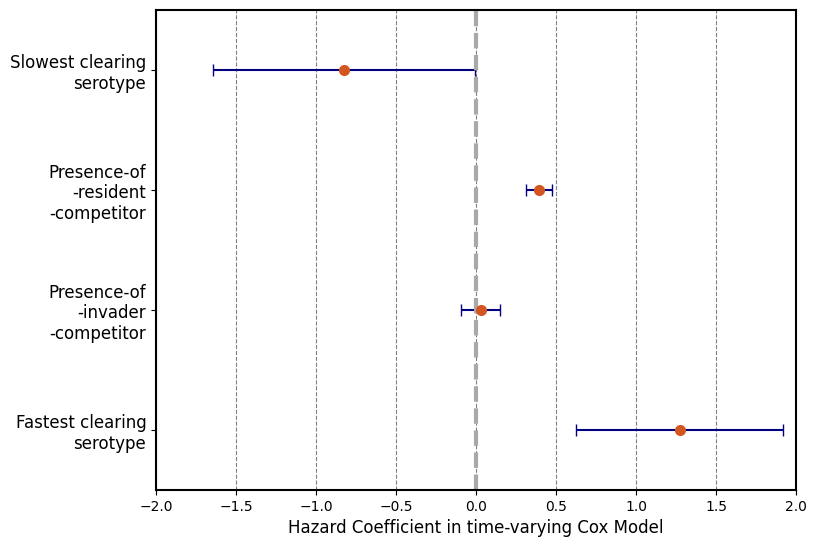

0

In [6]:
# r23 = clear.cc_resident_priority_effect(full_data, cocarriage_events)

# PLOTTING RESULT:
covariates_to_plot = ['12F', 'cc_priority', 'cc_wo_priority', '9A']
y_labels = ['Fastest clearing\nserotype', 'Presence-of\n-invader\n-competitor', 'Presence-of\n-resident\n-competitor', 'Slowest clearing\nserotype']
size = (8,1.5*len(y_labels))
xlim = [-2, 2]
clear.plot_all_covariate_model(r23.summary, covariates_to_plot, y_labels, size, xlim, filename='fig2c.svg')

In [26]:
(r23.summary)

51

In [ ]:
# Insert histograms of null distributions for comparison
# null_dist_cc_priority, null_dist_cc_wo_priority = clear.permute_resident_effect_test(full_data, times=100)

fig = plt.figure(figsize=(8,2))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])
ax.set_xlim(-2,2)
ax.hist(null_dist_cc_priority, bins=10, color='grey')
plt.savefig('fig2cnull1.svg', transparent=True)
plt.show()

# ____________

fig = plt.figure(figsize=(8,2))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])
ax.set_xlim(-2,2)
ax.hist(null_dist_cc_wo_priority, bins=8, color='grey')
plt.savefig('fig2cnull2.svg', transparent=True)
plt.show()


#### Section 3: Within-host competition reduces establishment rate

In [9]:
# Data processing
# establishment_df = est.get_establishment_df(full_data, cocarriage_events)
# estab_host_carriages_df = est.get_establishment_co_carriage_df(establishment_df, full_data)
e_effective_drug_df, e_ineffective_drug_df, e_res_without_drug = est.get_est_drug_res_info(establishment_df, full_data, illness_df, treat_length=7)

Result 3.1: Presence of competitor increases time to establishment

Iteration 1: norm_delta = 3.98e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 7.25e-03, step_size = 0.9500, log_lik = -6656.78805, newton_decrement = 3.80e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 3.63e-04, step_size = 0.9500, log_lik = -6656.75012, newton_decrement = 9.50e-05, seconds_since_start = 0.8
Iteration 4: norm_delta = 1.91e-05, step_size = 1.0000, log_lik = -6656.75003, newton_decrement = 2.37e-07, seconds_since_start = 1.1
Iteration 5: norm_delta = 5.12e-13, step_size = 1.0000, log_lik = -6656.75003, newton_decrement = 1.71e-22, seconds_since_start = 1.4
Convergence completed after 5 iterations.


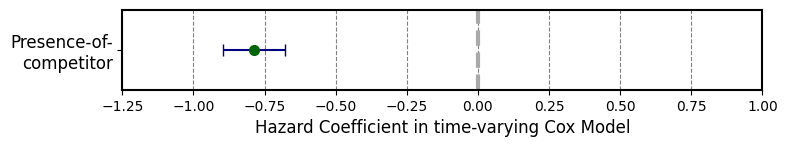

0

In [10]:
r31 = est.estab_survival_cox_basic(establishment_df, estab_host_carriages_df)

covariates_to_plot = ['Host_carry']
y_labels = ['Presence-of-\ncompetitor']
size = (8, 1*len(y_labels))
xlim = [-1.25, 1]
clear.plot_all_covariate_model(r31.summary, covariates_to_plot, y_labels, size, xlim, filename='fig2d.svg')

Result 3.2: Resident serotype affects competition for establishment

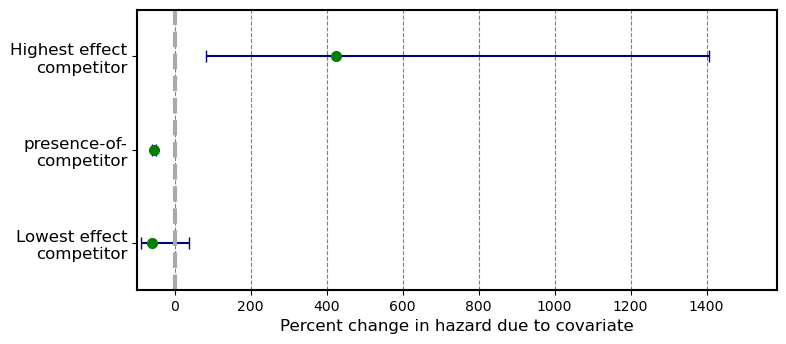

0

In [98]:
r32 = est.estab_survival_sero_competition(establishment_df, estab_host_carriages_df)

# PLOTTING THE RESULTS:
covariates_to_plot = ['23B', 'Host_carry', '45']
y_labels = ['Lowest effect\ncompetitor', 'Presence-of-\ncompetitor', 'Highest effect\ncompetitor']
size = (8,3.5)
xlim = [-100, 1585]
clear.plot_all_covariate_model(r32.summary, covariates_to_plot, y_labels, size, xlim, filename='fig2e.svg')

#### Section 4: Effect of drugs on clearance and establishment

Result 4.1: Effect of effective and ineffective drug use on clearance

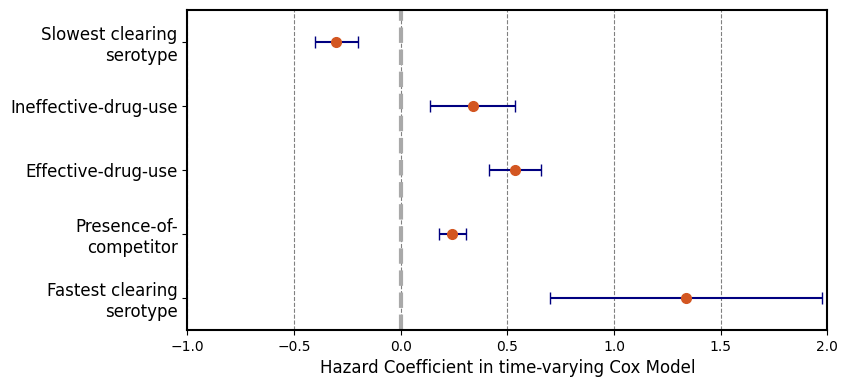

0

In [13]:
# r41 = clear.effects_of_drugs(full_data, cocarriage_events, effective_drug_df, ineffective_drug_df)

# PLOTTING THE RESULTS:
covariates_to_plot = ['12F', 'Co_carried', 'Drug_use', 'Ineff_Drug_use', '23F']
y_labels = ['Fastest clearing\nserotype', 'Presence-of-\ncompetitor',
            'Effective-drug-use', 'Ineffective-drug-use', 'Slowest clearing\nserotype']
size = (8,0.8*len(y_labels))
xlim = [-1, 2]
clear.plot_all_covariate_model(r41.summary, covariates_to_plot, y_labels, size, xlim, filename='fig4a.svg')


Result 4.2: Effect of effective and ineffective drug use on establishment

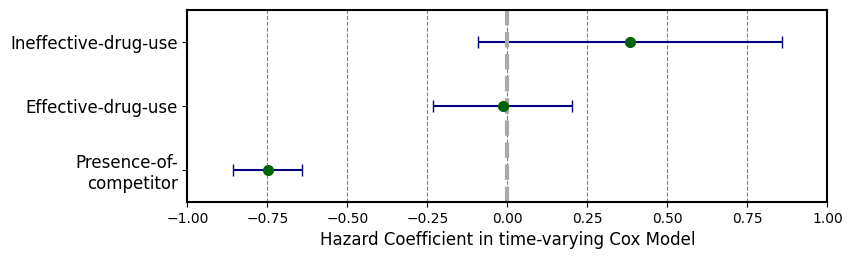

0

In [16]:
# r42 = est.estab_survival_res_and_drugs(establishment_df, estab_host_carriages_df, e_effective_drug_df,
#                                        e_ineffective_drug_df)

# PLOTTING THE RESULTS:
covariates_to_plot = ['Host_carry', 'Drug_use', 'Ineff_Drug_use']
y_labels = ['Presence-of-\ncompetitor',
            'Effective-drug-use', 'Ineffective-drug-use']
size = (8,0.8*len(y_labels))
xlim = [-1, 1]
clear.plot_all_covariate_model(r42.summary, covariates_to_plot, y_labels, size, xlim, filename='fig4b.svg')

In [32]:
len(r41.summary)

59

#### Section 5: Effect of resistance and cost of resistance

Section 5.1: Effect of antibiotic resistance on clearance rate of strains

Tested for individual drugs: Erythromycin (no cost), clindamycin(no cost), cotrimoxazole

Iteration 1: norm_delta = 4.03e-01, step_size = 0.9500, log_lik = -31313.46095, newton_decrement = 3.27e+02, seconds_since_start = 1.4
Iteration 2: norm_delta = 6.35e-02, step_size = 0.9500, log_lik = -31043.43530, newton_decrement = 2.00e+01, seconds_since_start = 3.1
Iteration 3: norm_delta = 1.75e-02, step_size = 0.9500, log_lik = -31021.68460, newton_decrement = 1.21e+00, seconds_since_start = 4.7
Iteration 4: norm_delta = 3.31e-03, step_size = 1.0000, log_lik = -31020.41655, newton_decrement = 2.74e-02, seconds_since_start = 6.2
Iteration 5: norm_delta = 1.42e-04, step_size = 1.0000, log_lik = -31020.38865, newton_decrement = 3.36e-05, seconds_since_start = 7.7
Iteration 6: norm_delta = 4.32e-07, step_size = 1.0000, log_lik = -31020.38862, newton_decrement = 2.85e-10, seconds_since_start = 9.2
Convergence completed after 6 iterations.


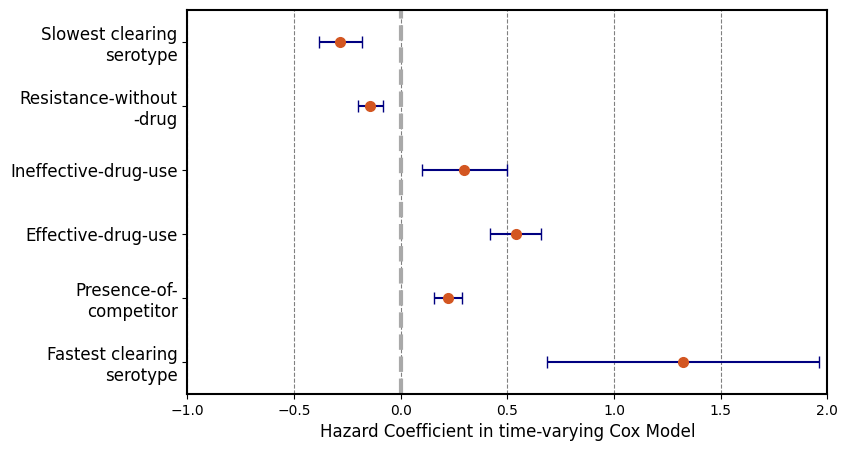

0

In [34]:
r51 = clear.cost_of_resistance(full_data, cocarriage_events, D_minus_df,
                               effective_drug_df, ineffective_drug_df, interaction=0)

# PLOTTING THE RESULTS:
covariates_to_plot = ['sero_12F', 'Co_carried', 'Drug_use', 'Ineff_Drug_use', 'D_minus', 'sero_23F']
y_labels = ['Fastest clearing\nserotype', 'Presence-of-\ncompetitor',
            'Effective-drug-use', 'Ineffective-drug-use', 'Resistance-without\n-drug', 'Slowest clearing\nserotype']
size = (8,0.8*len(y_labels))
xlim = [-1, 2]
clear.plot_all_covariate_model(r51.summary, covariates_to_plot, y_labels, size, xlim, filename='figs8.svg')

Section 5.2: Effect of resistance on within-host competition between serotypes

Iteration 1: norm_delta = 4.03e-01, step_size = 0.9500, log_lik = -31313.46095, newton_decrement = 3.27e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.39e-02, step_size = 0.9500, log_lik = -31043.36737, newton_decrement = 2.01e+01, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.75e-02, step_size = 0.9500, log_lik = -31021.56077, newton_decrement = 1.21e+00, seconds_since_start = 0.9
Iteration 4: norm_delta = 3.31e-03, step_size = 1.0000, log_lik = -31020.29294, newton_decrement = 2.74e-02, seconds_since_start = 1.2
Iteration 5: norm_delta = 1.42e-04, step_size = 1.0000, log_lik = -31020.26505, newton_decrement = 3.36e-05, seconds_since_start = 1.4
Iteration 6: norm_delta = 4.33e-07, step_size = 1.0000, log_lik = -31020.26502, newton_decrement = 2.85e-10, seconds_since_start = 1.7
Convergence completed after 6 iterations.


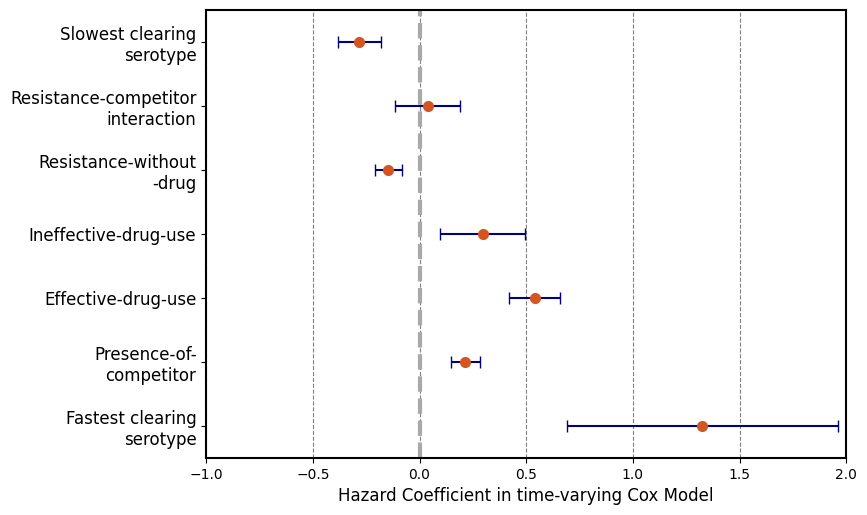

0

In [19]:
r52 = clear.cost_of_resistance(full_data, cocarriage_events, D_minus_df,
                               effective_drug_df, ineffective_drug_df, interaction=1)

# PLOTTING THE RESULTS:
covariates_to_plot = ['sero_12F', 'Co_carried', 'Drug_use', 'Ineff_Drug_use', 'D_minus',
                      'D_minus:Co_carried', 'sero_23F']
y_labels = ['Fastest clearing\nserotype', 'Presence-of-\ncompetitor',
            'Effective-drug-use', 'Ineffective-drug-use', 'Resistance-without\n-drug',
            'Resistance-competitor\ninteraction', 'Slowest clearing\nserotype']
size = (8,0.8*len(y_labels))
xlim = [-1, 2]
clear.plot_all_covariate_model(r52.summary, covariates_to_plot, y_labels, size, xlim, filename='fig4c.svg')

Section 5.3: Effect of resistance on within-host competition during establishment

During establishment, what is the effect of resistance on the focal strain to establish into an occupied niche. We look at the interaction term between resistance and presence-of-competitor (Which is not confounded by resistance coefficient). We expect establishment of resistance strains to be slower, so the interaction term should be positive.

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.20e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.98e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 9.66e-03, step_size = 0.9500, log_lik = -6659.73353, newton_decrement = 6.24e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 5.30e-04, step_size = 0.9500, log_lik = -6659.67118, newton_decrement = 1.72e-04, seconds_since_start = 1.0
Iteration 4: norm_delta = 2.81e-05, step_size = 1.0000, log_lik = -6659.67101, newton_decrement = 4.33e-07, seconds_since_start = 1.3
Iteration 5: norm_delta = 5.25e-10, step_size = 1.0000, log_lik = -6659.67101, newton_decrement = 8.00e-17, seconds_since_start = 1.6
Convergence completed after 5 iterations.


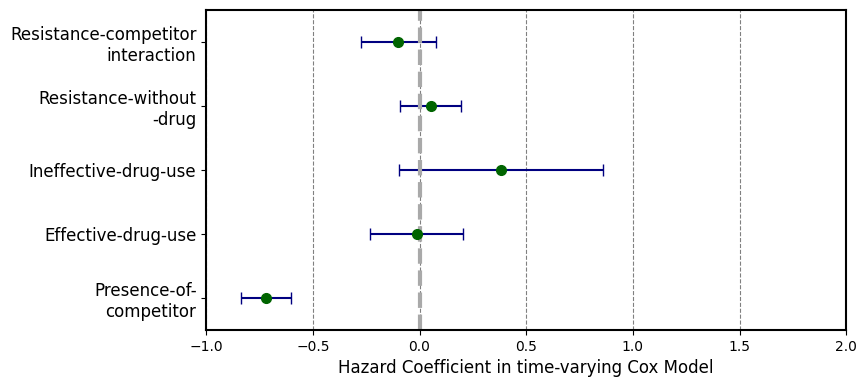

0

In [17]:
r53 = est.estab_withinhostcost_resistance(establishment_df, estab_host_carriages_df,
                                          e_effective_drug_df, e_ineffective_drug_df, e_res_without_drug)

# PLOTTING THE RESULTS:
covariates_to_plot = ['Host_carry', 'Drug_use', 'Ineff_Drug_use', 'D_minus',
                      'D_minus:Host_carry']
y_labels = ['Presence-of-\ncompetitor',
            'Effective-drug-use', 'Ineffective-drug-use', 'Resistance-without\n-drug',
            'Resistance-competitor\ninteraction']
size = (8, 0.8 * len(y_labels))
xlim = [-1, 2]
clear.plot_all_covariate_model(r53.summary, covariates_to_plot, y_labels, size, xlim, filename='fig4d.svg')


#### For each resistance: Competitive ability during clearance

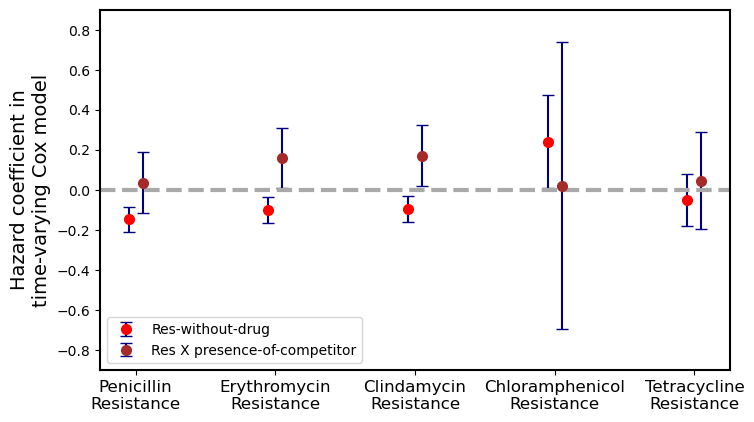

In [28]:
# resistances = ['penicillin', 'ERYTHROMYCIN', 'CLINDAMYCIN']
# cox_list_res = []

# # For each of these drugs, I create drug dataframes, and do the analysis 5.2

# for d in resistances:
#     eff_df = DATAds.effective_drug_separated(full_data, illness_df, treat_length=7,
#                             drug=d)
#     ineff_df, rwd = DATAds.ineffective_drug_separated(full_data, illness_df, treat_length=7,
#                                drug=d)
#     try:
#         cph = clear.cost_of_resistance(full_data, cocarriage_events, rwd,
#                        eff_df, ineff_df, interaction=1)
#         cox_list_res.append(cph)
#     except:
#         cox_list_res.append('none')

# # For chloramphenicol and tetracycline, I use the model without including drug effects

# for drug in ['chloramphenicol', 'tetracycline' ]:
#     cph = clear.focal_res_on_survival(full_data, cocarriage_events, drug, interaction=1)
#     cox_list_res.append(cph)

# -------------------------------------PLOTTING-------------------------------------
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(7,4))
# Add axes: [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

for i in range(len(cox_list_res[0:3])):
      summary_df = cox_list_res[i].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
      summary_df = summary_df.loc[['D_minus', 'D_minus:Co_carried']]

      ax.errorbar(i-0.05, summary_df['coef']['D_minus'],
                yerr=[summary_df['coef']['D_minus'] - summary_df['coef lower 95%']['D_minus']],
                fmt='o', color='red', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
      ax.errorbar(i+0.05, summary_df['coef']['D_minus:Co_carried'],
                yerr=[summary_df['coef']['D_minus:Co_carried'] - summary_df['coef lower 95%']['D_minus:Co_carried']],
                fmt='o', color='brown', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

for j in range(len(cox_list_res[3:5])):
      summary_df = cox_list_res[j+3].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
      summary_df = summary_df.loc[['foc_res', 'foc_res:Co_carried']]

      ax.errorbar(j+3-0.05, summary_df['coef']['foc_res'],
                yerr=[summary_df['coef']['foc_res'] - summary_df['coef lower 95%']['foc_res']],
                fmt='o', color='red', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
      ax.errorbar(j+3+0.05, summary_df['coef']['foc_res:Co_carried'],
                yerr=[summary_df['coef']['foc_res:Co_carried'] - summary_df['coef lower 95%']['foc_res:Co_carried']],
                fmt='o', color='brown', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

ax.legend(['Res-without-drug', 'Res X presence-of-competitor'], loc=3)
ax.set_xticks(np.arange(5))
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticklabels(['Penicillin\nResistance', 'Erythromycin\nResistance', 'Clindamycin\nResistance',
                    'Chloramphenicol\nResistance', 'Tetracycline\nResistance'],
                   fontsize=12, color='black', rotation=0)
ax.set_ylabel('Hazard coefficient in\ntime-varying Cox model', fontsize=14)
ax.set_ylim(-0.9,0.9)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.savefig('fig4e.svg', transparent=True)
plt.show()


In [32]:
for i in [3,4]:
    summary_df = cox_list_res[i].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
    summary_df = summary_df.loc[['foc_res', 'foc_res:Co_carried']]
    print(summary_df)

                        coef  coef lower 95%  coef upper 95%
covariate                                                   
foc_res             0.240971        0.009419        0.472524
foc_res:Co_carried  0.020316       -0.698082        0.738714
                        coef  coef lower 95%  coef upper 95%
covariate                                                   
foc_res            -0.050582       -0.181076        0.079912
foc_res:Co_carried  0.046678       -0.196765        0.290120


#### Effect of resistance on competitive ability at establishment

In [45]:
resistances = ['penicillin', 'ERYTHROMYCIN', 'CLINDAMYCIN']
estab_cox_res_list = []

# For each of these drugs, I create drug dataframes, and do the analysis 5.2

for d in resistances:
    e_effective, e_ineff, e_res_by_drug = DATAds.est_drug_res_info_drug_separated(establishment_df,
                                    full_data, illness_df, treat_length=7,
                                    drug=d)
    try:
        cph = est.estab_withinhostcost_resistance(establishment_df, estab_host_carriages_df,
                                          e_effective, e_ineff, e_res_by_drug)
        estab_cox_res_list.append(cph)
    except:
        estab_cox_res_list.append('none')


/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.24e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.99e+01, seconds_since_start = 0.2
Iteration 2: norm_delta = 8.53e-03, step_size = 0.9500, log_lik = -6659.55499, newton_decrement = 5.82e-02, seconds_since_start = 0.5
Iteration 3: norm_delta = 4.52e-04, step_size = 0.9500, log_lik = -6659.49691, newton_decrement = 1.55e-04, seconds_since_start = 0.7
Iteration 4: norm_delta = 2.39e-05, step_size = 1.0000, log_lik = -6659.49676, newton_decrement = 3.88e-07, seconds_since_start = 1.0
Iteration 5: norm_delta = 3.02e-10, step_size = 1.0000, log_lik = -6659.49676, newton_decrement = 2.52e-17, seconds_since_start = 1.2
Convergence completed after 5 iterations.


/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_use'].var())

A very low variance means that the column Drug_use completely determines whether a subject dies or not. See https:

Iteration 1: norm_delta = 3.96e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.04e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 1.89e-02, step_size = 0.9500, log_lik = -6656.02478, newton_decrement = 9.92e-02, seconds_since_start = 0.5
Iteration 3: norm_delta = 1.77e-03, step_size = 0.9500, log_lik = -6655.92490, newton_decrement = 4.97e-04, seconds_since_start = 0.7
Iteration 4: norm_delta = 1.07e-04, step_size = 1.0000, log_lik = -6655.92440, newton_decrement = 1.49e-06, seconds_since_start = 1.0
Iteration 5: norm_delta = 5.41e-08, step_size = 1.0000, log_lik = -6655.92440, newton_decrement = 2.67e-13, seconds_since_start = 1.2
Convergence completed after 5 iterations.


/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_use'].var())

A very low variance means that the column Drug_use completely determines whether a subject dies or not. See https:

Iteration 1: norm_delta = 3.91e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 1.22e-02, step_size = 0.9500, log_lik = -6656.63359, newton_decrement = 7.31e-02, seconds_since_start = 0.4
Iteration 3: norm_delta = 6.87e-04, step_size = 0.9500, log_lik = -6656.56050, newton_decrement = 2.17e-04, seconds_since_start = 0.7
Iteration 4: norm_delta = 3.64e-05, step_size = 1.0000, log_lik = -6656.56028, newton_decrement = 5.48e-07, seconds_since_start = 0.9
Iteration 5: norm_delta = 7.43e-10, step_size = 1.0000, log_lik = -6656.56028, newton_decrement = 1.40e-16, seconds_since_start = 1.2
Convergence completed after 5 iterations.


/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_use'].var())

A very low variance means that the column Drug_use completely determines whether a subject dies or not. See https:

Iteration 1: norm_delta = 3.91e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 1.20e-02, step_size = 0.9500, log_lik = -6656.61022, newton_decrement = 7.31e-02, seconds_since_start = 0.4
Iteration 3: norm_delta = 6.83e-04, step_size = 0.9500, log_lik = -6656.53713, newton_decrement = 2.17e-04, seconds_since_start = 0.7
Iteration 4: norm_delta = 3.62e-05, step_size = 1.0000, log_lik = -6656.53692, newton_decrement = 5.48e-07, seconds_since_start = 0.9
Iteration 5: norm_delta = 7.65e-10, step_size = 1.0000, log_lik = -6656.53691, newton_decrement = 1.41e-16, seconds_since_start = 1.1
Convergence completed after 5 iterations.


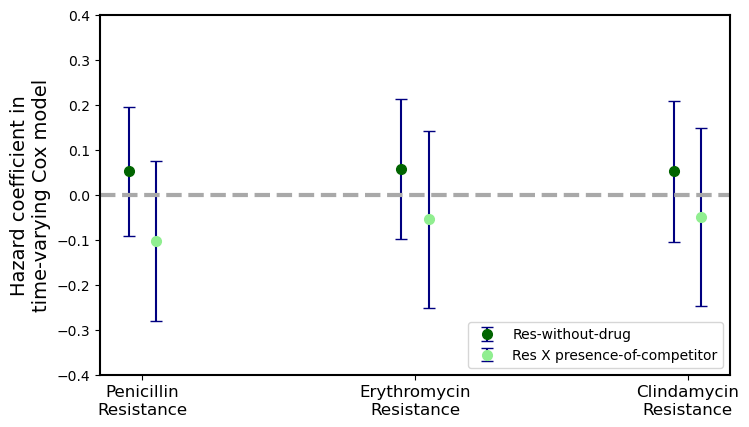

In [63]:
fig = plt.figure(figsize=(7,4))
# Add axes: [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

for i in range(len(estab_cox_res_list[0:3])):
      summary_df = estab_cox_res_list[i].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
      summary_df = summary_df.loc[['D_minus', 'D_minus:Host_carry']]

      ax.errorbar(i-0.05, summary_df['coef']['D_minus'],
                yerr=[summary_df['coef']['D_minus'] - summary_df['coef lower 95%']['D_minus']],
                fmt='o', color='darkgreen', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
      ax.errorbar(i+0.05, summary_df['coef']['D_minus:Host_carry'],
                yerr=[summary_df['coef']['D_minus:Host_carry'] - summary_df['coef lower 95%']['D_minus:Host_carry']],
                fmt='o', color='lightgreen', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

ax.legend(['Res-without-drug', 'Res X presence-of-competitor'], loc=4)
ax.set_xticks(np.arange(len(estab_cox_res_list[0:3])))
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticklabels(['Penicillin\nResistance', 'Erythromycin\nResistance', 'Clindamycin\nResistance'],
                   fontsize=12, color='black', rotation=0)
ax.set_ylabel('Hazard coefficient in\ntime-varying Cox model', fontsize=14)
ax.set_ylim(-0.4,0.4)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.savefig('fig4f.svg', transparent=True)
plt.show()


In [64]:
s1.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Host_carry,-0.722321,0.485624,0.060424,-0.840750,-0.603891,0.431387,0.546680,0.0,-11.954120,6.178452e-33,106.996382
Drug_use,0.026085,1.026428,0.114377,-0.198089,0.250259,0.820297,1.284358,0.0,0.228061,8.195988e-01,0.287010
Ineff_Drug_use,0.334538,1.397294,0.225167,-0.106782,0.775858,0.898721,2.172455,0.0,1.485729,1.373509e-01,2.864062
D_minus,0.052593,1.054001,0.073220,-0.090916,0.196103,0.913094,1.216652,0.0,0.718286,4.725810e-01,1.081366
D_minus:Host_carry,-0.101783,0.903226,0.090709,-0.279569,0.076004,0.756109,1.078967,0.0,-1.122077,2.618296e-01,1.933300
